In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from BanditRec.settings import NewsSimulationSetting, NewsSimulationSetting2
from BanditRec.setting import SettingConfig
from BanditRec.agents import RandomAgent, EpsGreedyAgent, ThompsonAgent, FroomleAgent
from BanditRec.simulator import Simulator

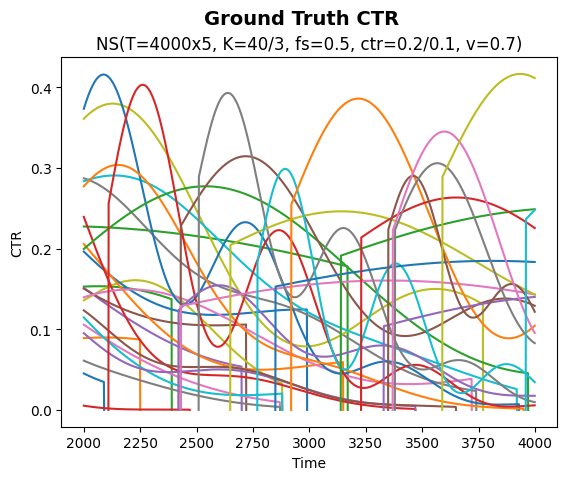

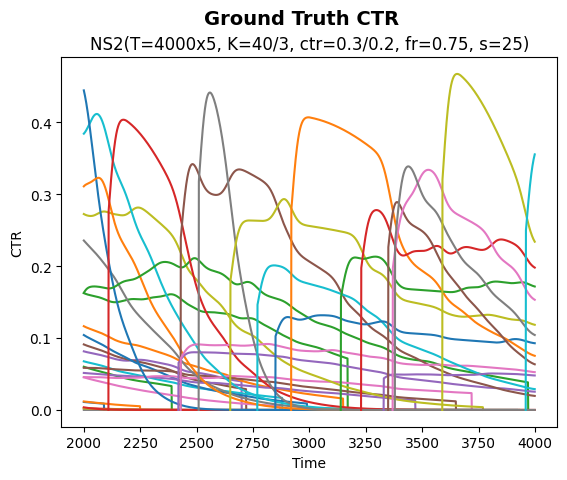

In [3]:
s1 = NewsSimulationSetting(
    SettingConfig(4000, 40, 3, 5),
    lifetime=2000,
    falloff_speed=0.5, 
    ctr_base=0.2,
    ctr_fuzz=0.1
)
s2 = NewsSimulationSetting2(
    SettingConfig(4000, 40, 3, 5),
    lifetime=2000,
    smoothing=25,
    falloff_rate=0.75,
    ctr_base=0.3,
    ctr_fuzz=0.2
)
s1.visualize(tmin=2000)
s2.visualize(tmin=2000)

# No sliding window

In [6]:
sim1 = Simulator(run_count=100, seed_change_interval=5)

In [8]:
for s in [s1, s2]:
    sim1.set_setting(s)
    sim1.run_oracle()

    for b in [100, 500, 1000]:
        for r in [1, 2, 3]:
            sim1.run_agent(FroomleAgent, {'boost_denominator':b, 'boost_rank':r})

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 NS(T=4000x5, K=40/3, fs=0.5, ctr=0.2/0.1, v=0.7) 
     964.5 ±49.8       - FR(d=1000, r=1)
    1008.3 ±59.4       - FR(d=1000, r=2)
    1019.9 ±53.5       - FR(d=500, r=1)
    1036.2 ±63.1       - FR(d=500, r=2)
    1193.5 ±78.7       - FR(d=1000, r=3)
    1218.3 ±74.7       - FR(d=500, r=3)
    1236.2 ±71.1       - FR(d=100, r=1)
    1399.2 ±82.4       - FR(d=100, r=2)
    1640.8 ±99.1       - FR(d=100, r=3)

 NS2(T=4000x5, K=40/3, ctr=0.3/0.2, fr=0.75, s=25) 
     963.2 ±39.2       - FR(d=1000, r=1)
     973.1 ±39.7       - FR(d=500, r=1)
     975.8 ±43.4       - FR(d=1000, r=2)
    1095.3 ±52.7       - FR(d=500, r=2)
    1163.5 ±59.1       - FR(d=100, r=1)
    1174.1 ±64.2       - FR(d=1000, r=3)
    1323.5 ±59.2       - FR(d=500, r=3)
    1428.7 ±69.3       - FR(d=100, r=2)
    1843.1 ±79.8       - FR(d=100, r=3)



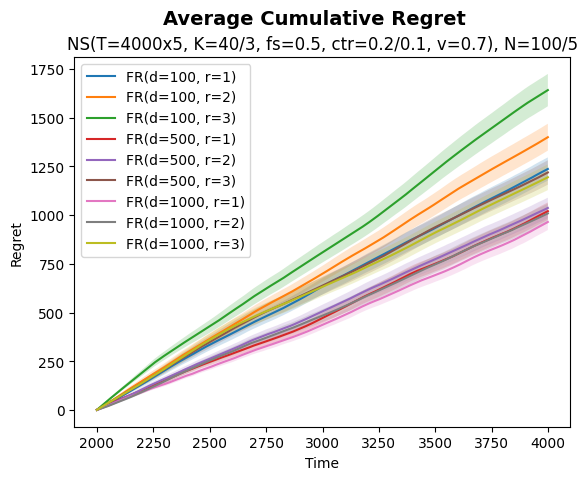

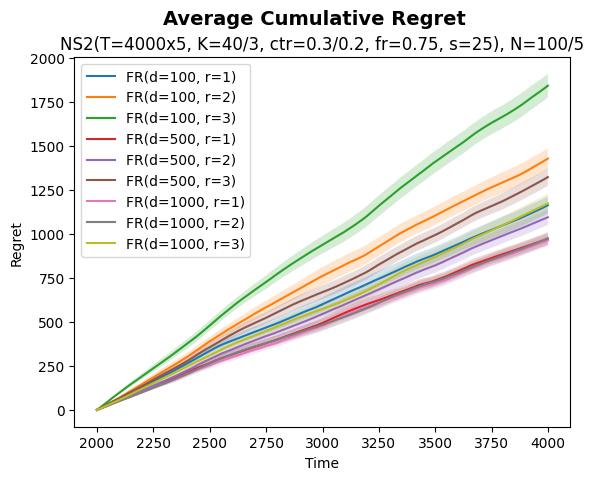

In [14]:
sim1.results.rank(tmin=2000)
sim1.results.create_regret_plot(tmin=2000, confidence=0.9)

# With sliding window

In [4]:
sim2 = Simulator(run_count=100, seed_change_interval=5)

In [5]:
for s in [s1, s2]:
    sim2.set_setting(s)
    sim2.run_oracle()

    for ws in [500, 1000, 3000]:
        for b in [50, 100, 500]:
            for r in [2]:
                sim2.run_agent(FroomleAgent, {'boost_denominator': b, 'boost_rank': r, 'ws': ws})

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 NS(T=4000x5, K=40/3, fs=0.5, ctr=0.2/0.1, v=0.7) 
     825.0 ±50.9       - SW-FR(d=50, r=2, ws=3000)
     924.5 ±60.6       - SW-FR(d=100, r=2, ws=3000)
    1176.0 ±71.4       - SW-FR(d=50, r=2, ws=1000)
    1226.0 ±93.5       - SW-FR(d=500, r=2, ws=3000)
    1388.9 ±88.0       - SW-FR(d=100, r=2, ws=1000)
    1603.2 ±93.0       - SW-FR(d=500, r=2, ws=1000)
    1715.5 ±95.6       - SW-FR(d=50, r=2, ws=500)
    1779.5 ±75.9       - SW-FR(d=500, r=2, ws=500)
    1865.4 ±113.0      - SW-FR(d=100, r=2, ws=500)

 NS2(T=4000x5, K=40/3, ctr=0.3/0.2, fr=0.75, s=25) 
     883.0 ±51.6       - SW-FR(d=50, r=2, ws=3000)
    1070.2 ±51.0       - SW-FR(d=100, r=2, ws=3000)
    1407.0 ±68.0       - SW-FR(d=50, r=2, ws=1000)
    1520.6 ±112.3      - SW-FR(d=500, r=2, ws=3000)
    1718.6 ±101.8      - SW-FR(d=100, r=2, ws=1000)
    1819.9 ±131.7      - SW-FR(d=500, r=2, ws=1000)
    1881.9 ±98.9       - SW-FR(d=500, r=2, ws=500)
    1968.2 ±98.8       - SW-FR(d=50, r=2, ws=500)
    2202.4 ±110.0      

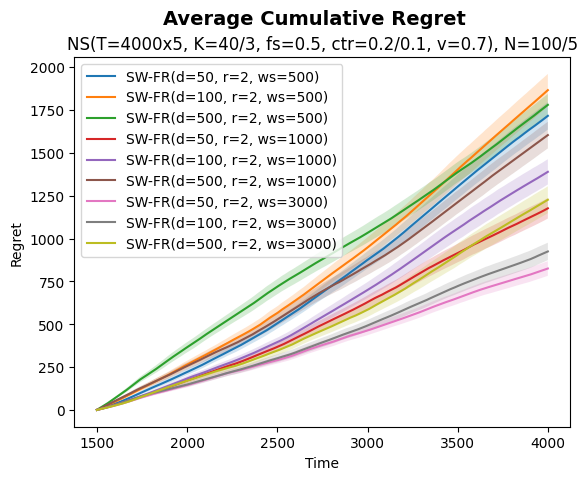

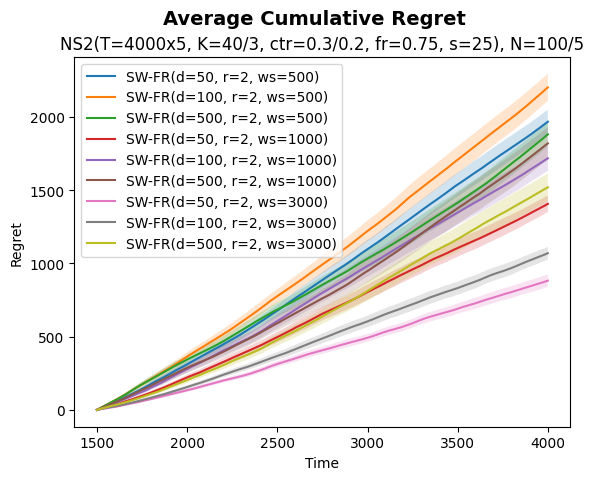

In [7]:
sim2.results.rank(tmin=1500)
sim2.results.create_regret_plot(tmin=1500, confidence=0.9)